<a href="https://colab.research.google.com/github/Aasthapriy44/ML_6A_003/blob/main/LAB7_SVM_1VBM22CS003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9788029925187033
Confusion Matrix:
 [[161   0   1   0   0]
 [  1 160   0   0   1]
 [  0   0 171   1   0]
 [  3   0   2 154   0]
 [  0   7   0   1 139]]


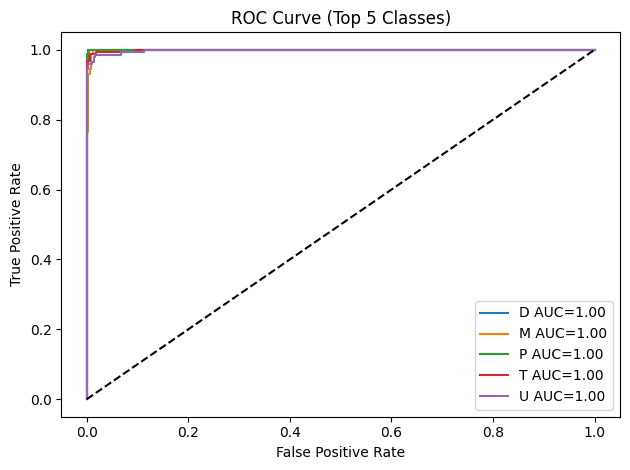

Macro AUC Score: 0.999169118197004


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load dataset
df = pd.read_csv("letter-recognition.csv")

# Use only top 5 most frequent classes to reduce computation
top_classes = df['letter'].value_counts().head(5).index.tolist()
df = df[df['letter'].isin(top_classes)]

# Features and target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Binarize labels for ROC
y_bin = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_bin.shape[1]

# Train-test split
X_train, X_test, y_train, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train SVM with linear kernel
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train.argmax(axis=1))
y_score = svm_model.predict_proba(X_test)

# Predict class labels
y_pred = svm_model.predict(X_test)
y_true = y_test_bin.argmax(axis=1)

# Accuracy and confusion matrix
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Fast ROC curve (limited to top 5 classes)
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"{label_encoder.inverse_transform([i])[0]} AUC={auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Top 5 Classes)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Macro AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("Macro AUC Score:", macro_auc)